In [1]:
# continuing the LOGISTIC REGRESSION by introducing REGULARIZATION
# in order to prevent OVER-FITTING

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import itertools
%matplotlib inline

In [ ]:
np.random.seed(seed=1)

In [ ]:
# reading the TRAINING DATA and using 1-HOT ENCODING

In [4]:
train_df = pd.read_csv("student-mat-train.csv")
train_dummies_df = pd.get_dummies(train_df, drop_first=True)
train_dummies_df.head(3)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,1,1,2,2,0,5,4,4,1,...,1,0,1,0,0,1,1,1,1,0
1,17,3,3,1,2,0,5,3,3,2,...,1,0,0,1,0,1,1,1,1,1
2,18,4,4,1,3,0,4,3,3,2,...,1,0,0,0,0,1,1,1,1,0


In [ ]:
# reading the TESTING DATA and using 1-HOT ENCODING

In [5]:
test_df = pd.read_csv("student-mat-test.csv")
test_dummies_df = pd.get_dummies(test_df, drop_first=True)
test_dummies_df.head(2)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,2,2,1,3,0,4,3,3,1,...,1,0,0,1,1,1,1,1,1,1
1,15,4,4,1,2,1,4,4,4,1,...,0,0,1,1,0,1,0,1,1,0


In [ ]:
# separate the data into TRAINING and TESTING datasets

In [6]:
# separate our training data into predictors and predictand
xCols = [col for col in train_dummies_df.columns if col not in ['pass', 'G3']]
X_train = train_dummies_df[xCols]
y_train = train_dummies_df['pass']

In [7]:
# separate our testing data into predictors and predictand
X_test = test_dummies_df[xCols]
y_test = test_dummies_df['pass']

In [ ]:
# in order to prevent OVER-FITTING

In [ ]:
# Feature filters are methods to simple reduce the number of features your model can train on. 

# Early-Stopping is the practice of stopping the training early as soon as the performance 
# in your cross-validation decreases

# Hyper-parameter settings 

# REGULARIZATION

In [ ]:
# "LASSO" or "L1" pushes the coefficients to 0 and effectively removes the features completely. 
# "Ridge" or L2" does not reduce coefficients all the way to zero.

In [9]:
# to apply REGULARIZATION
# to change the C value when we create our LogisticRegression object. 
# the smaller the value of C, the stronger the regularization. 

In [10]:
reg_params = [1e15, 10000, 1000, 100, 10, 1, 0.1, 0.01]
reg_params = np.arange(0.5, 0.01, -0.01)

train_scores = []

test_scores = []

coefs = []

for c in reg_params:
    # Create and fit a model with the value of c
    logReg = LogisticRegression(C=c, penalty='l2')
    logReg.fit(X_train, y_train)
    coefs.append(logReg.coef_.reshape(-1))
    
    # Find the accuracy on the training data
    train_data_accuracy = accuracy_score(logReg.predict(X_train), y_train)
    train_scores.append(train_data_accuracy)
    
    # Find the accuracy on the testing data
    test_data_accuracy = accuracy_score(logReg.predict(X_test) , y_test)
    test_scores.append(test_data_accuracy)

/home/bogdan/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/bogdan/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Text(0, 0.5, 'Accuracy')

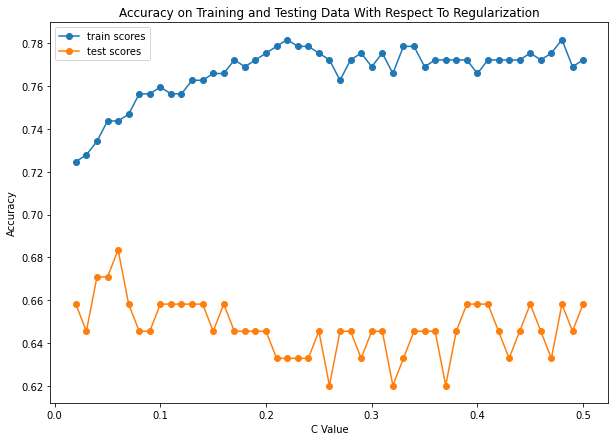

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.plot(reg_params, train_scores, label='train scores', marker='o')
ax.plot(reg_params, test_scores, label='test scores', marker='o')

ax.legend()
ax.set_title('Accuracy on Training and Testing Data With Respect To Regularization')
ax.set_xlabel('C Value')
ax.set_ylabel('Accuracy')

In [ ]:
# VALIDATION SET
# A VALIDATION SET is taken from the TRAINING SET and used to set HYPER-PARAMETER values (like REGULARIZATION). 

In [ ]:
# CROSS VALIDATION is when you iterate through different VALIDATION SETS in the TRAINING DATA.

In [ ]:
# applying CROSS-VALIDATED REGULARIZATION

In [15]:
reg_params = [1e15, 10000, 1000, 100, 10, 1, 0.1, 0.01]
reg_params = np.arange(0.5, 0.01, -0.005)

logRegCV = LogisticRegressionCV(Cs=reg_params, penalty='l1', cv=5, solver="liblinear")

# it loops through the values of reg_params using a cross_vaidation = 5
# for each value of C, it does the CV CROSS VALIDATION

logRegCV.fit(X_train, y_train)

LogisticRegressionCV(Cs=array([0.5  , 0.495, 0.49 , 0.485, 0.48 , 0.475, 0.47 , 0.465, 0.46 ,
       0.455, 0.45 , 0.445, 0.44 , 0.435, 0.43 , 0.425, 0.42 , 0.415,
       0.41 , 0.405, 0.4  , 0.395, 0.39 , 0.385, 0.38 , 0.375, 0.37 ,
       0.365, 0.36 , 0.355, 0.35 , 0.345, 0.34 , 0.335, 0.33 , 0.325,
       0.32 , 0.315, 0.31 , 0.305, 0.3  , 0.295, 0.29 , 0.285, 0.28 ,
       0.275, 0.27 , 0.265, 0.26 , 0.255, 0.25 , 0.245, 0.24 , 0.235,
       0.23 , 0.225, 0.22 , 0.215, 0.21 , 0.205, 0.2  , 0.195, 0.19 ,
       0.185, 0.18 , 0.175, 0.17 , 0.165, 0.16 , 0.155, 0.15 , 0.145,
       0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 , 0.105, 0.1  ,
       0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065, 0.06 , 0.055,
       0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 , 0.015]),
                     cv=5, penalty='l1', solver='liblinear')

In [ ]:
# print(logRegCV.scores_)
# print(logRegCV.scores_[1].mean(axis=0))
# print(logRegCV.C_)

In [ ]:
# The scores_ attribute gives us the scores, per C value, per cross-validation fold, for each class. 
# We can average across cross validation folds to find the best value of C in terms of accuracy.
# The C_ gives the best value of C.


0.7151785714285714


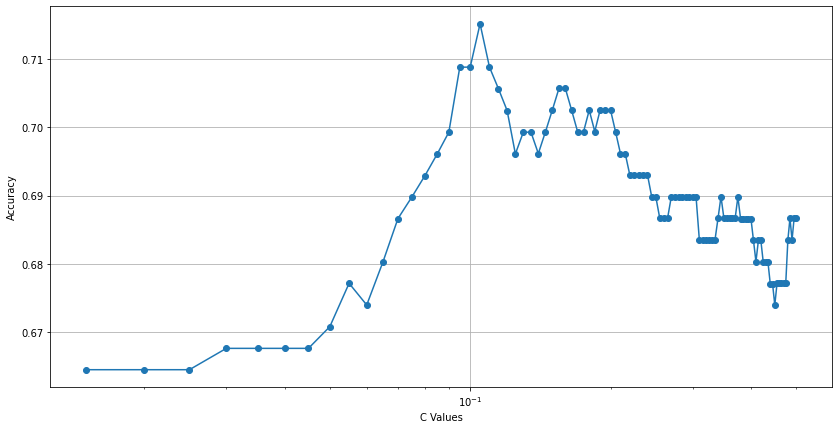

In [16]:
fig, axs = plt.subplots(1, 1, figsize=(14, 7))
axs.plot(logRegCV.Cs_, logRegCV.scores_[1].mean(axis=0), marker='o')
axs.set_xscale('log')
axs.set_title('')
axs.set_xlabel('C Values')
axs.set_ylabel('Accuracy')
axs.grid()

# printing max accuracy
print(logRegCV.scores_[1].mean(axis=0).max())

In [17]:
# SOME COEFFICIENTS have been pushed to ZERO !
print(logRegCV.coef_)

[[ 0.06871353  0.07552783  0.10152043  0.          0.         -0.49290527
   0.03099821  0.         -0.2407634   0.          0.03228597 -0.01684737
  -0.0242718   0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]


In [18]:
# PRINTING out the columns that correspond to the non-zero coefficients
for coef, col in zip(logRegCV.coef_[0], X_train.columns):
    if coef != 0:
        print('{:.3f} * {}'.format(coef, col))



0.069 * age
0.076 * Medu
0.102 * Fedu
-0.493 * failures
0.031 * famrel
-0.241 * goout
0.032 * Walc
-0.017 * health
-0.024 * absences


In [19]:
# the FEATURES that have been retained by the MODEL
print('We have reduced from {} features to {}'.format(X_train.shape[1], sum(logRegCV.coef_[0] != 0)))

We have reduced from 39 features to 9


In [20]:
X_train.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,...,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,16.724684,2.759494,2.556962,1.471519,2.012658,0.329114,3.949367,3.180380,3.113924,1.490506,...,0.699367,0.079114,0.126582,0.620253,0.449367,0.515823,0.806962,0.943038,0.822785,0.306962
std,1.293509,1.117994,1.080821,0.736236,0.839405,0.751236,0.910590,1.012177,1.123909,0.889036,...,0.459261,0.270345,0.333032,0.486094,0.498219,0.500542,0.395309,0.232138,0.382456,0.461965
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.250000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# DATA STANDARDIZATION

In [ ]:
# The training algorithms can more effectively find the optimum when the input features are mean standardized. 
# We adjust the features so they have a mean of 0 and a standard deviation of 1. 
# i.e. we substract the mean from each feature, and then we divide by the standard deviation.

In [22]:
X_train_standardized = (X_train - X_train.mean()) / X_train.std()
X_train_standardized.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
count,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,...,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02
mean,7.869935e-17,-1.686415e-17,1.461559e-16,-1.714522e-16,-9.275281e-17,-5.621382e-18,-1.686415e-16,-5.621382e-17,-1.517773e-16,3.934968e-17,...,1.377239e-16,-2.248553e-17,-6.324055e-17,3.934968e-17,6.183521e-17,4.497106e-17,7.307797e-17,-1.321025e-16,-1.124276e-16,-4.216037e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.333337e+00,-2.468255e+00,-2.365759e+00,-6.404455e-01,-1.206400e+00,-4.380964e-01,-3.238963e+00,-2.154148e+00,-1.880868e+00,-5.517280e-01,...,-1.522811e+00,-2.926410e-01,-3.800907e-01,-1.275996e+00,-9.019476e-01,-1.030528e+00,-2.041347e+00,-4.062409e+00,-2.151317e+00,-6.644703e-01
25%,-5.602461e-01,-6.793364e-01,-5.153139e-01,-6.404455e-01,-1.206400e+00,-4.380964e-01,5.560451e-02,-1.782096e-01,-9.911162e-01,-5.517280e-01,...,-1.522811e+00,-2.926410e-01,-3.800907e-01,-1.275996e+00,-9.019476e-01,-1.030528e+00,4.883223e-01,2.453804e-01,4.633606e-01,-6.644703e-01
50%,2.128446e-01,2.151232e-01,4.099088e-01,-6.404455e-01,-1.508000e-02,-4.380964e-01,5.560451e-02,-1.782096e-01,-1.013642e-01,-5.517280e-01,...,6.546021e-01,-2.926410e-01,-3.800907e-01,7.812217e-01,-9.019476e-01,9.673055e-01,4.883223e-01,2.453804e-01,4.633606e-01,-6.644703e-01
75%,9.859352e-01,1.109583e+00,6.412145e-01,7.178147e-01,-1.508000e-02,-4.380964e-01,1.153794e+00,8.097596e-01,7.883879e-01,5.730853e-01,...,6.546021e-01,-2.926410e-01,-3.800907e-01,7.812217e-01,1.105203e+00,9.673055e-01,4.883223e-01,2.453804e-01,4.633606e-01,1.500196e+00
max,4.078298e+00,1.109583e+00,1.335132e+00,3.434335e+00,2.367559e+00,3.555321e+00,1.153794e+00,1.797729e+00,1.678140e+00,3.947525e+00,...,6.546021e-01,3.406342e+00,2.622626e+00,7.812217e-01,1.105203e+00,9.673055e-01,4.883223e-01,2.453804e-01,4.633606e-01,1.500196e+00


In [23]:
X_test_standardized = (X_test - X_train.mean()) / X_train.std()
X_test_standardized.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,...,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,-0.110092,-0.045289,-0.163964,-0.159037,0.135720,0.033700,-0.027802,0.272004,-0.022525,-0.053393,...,-0.089577,0.035117,0.038009,-0.078122,0.088924,-0.069545,-0.152100,0.136322,0.132389,0.294559
std,0.931398,0.896200,1.029686,0.689086,0.997954,0.954153,0.926722,0.906006,0.957761,1.014842,...,1.039354,1.057881,1.046175,1.021069,1.009907,1.004575,1.106991,0.681011,0.874947,1.082157
min,-1.333337,-1.573796,-2.365759,-0.640445,-1.206400,-0.438096,-2.140774,-2.154148,-1.880868,-0.551728,...,-1.522811,-0.292641,-0.380091,-1.275996,-0.901948,-1.030528,-2.041347,-4.062409,-2.151317,-0.664470
25%,-0.560246,-0.679336,-0.977925,-0.640445,-0.015080,-0.438096,0.055605,-0.178210,-0.991116,-0.551728,...,-1.522811,-0.292641,-0.380091,-1.275996,-0.901948,-1.030528,-0.776513,0.245380,0.463361,-0.664470
50%,0.212845,0.215123,-0.515314,-0.640445,-0.015080,-0.438096,0.055605,-0.178210,-0.101364,-0.551728,...,0.654602,-0.292641,-0.380091,0.781222,-0.901948,-1.030528,0.488322,0.245380,0.463361,-0.664470
75%,0.212845,1.109583,0.409909,0.717815,-0.015080,-0.438096,0.055605,0.809760,0.788388,0.573085,...,0.654602,-0.292641,-0.380091,0.781222,1.105203,0.967305,0.488322,0.245380,0.463361,1.500196
max,2.532116,1.109583,1.335132,2.076075,2.367559,3.555321,1.153794,1.797729,1.678140,3.947525,...,0.654602,3.406342,2.622626,0.781222,1.105203,0.967305,0.488322,0.245380,0.463361,1.500196


In [ ]:
### using LOGISTIC REGRESSION on STANDARDIZED DATA

In [24]:
logRegCVSD = LogisticRegressionCV(Cs=300, penalty='l1', cv=5, solver="liblinear", random_state=0)
logRegCVSD.fit(X_train_standardized, y_train)

LogisticRegressionCV(Cs=300, cv=5, penalty='l1', random_state=0,
                     solver='liblinear')

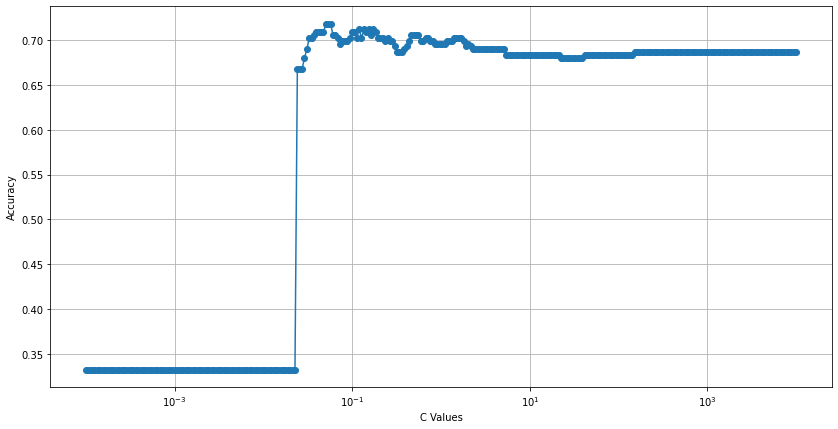

In [27]:
# the display :
fig, axs = plt.subplots(1, 1, figsize=(14, 7))
axs.plot(logRegCVSD.Cs_, logRegCVSD.scores_[1].mean(axis=0), marker='o')
axs.set_xscale('log')
axs.set_title('')
axs.set_xlabel('C Values')
axs.set_ylabel('Accuracy')
axs.grid()

In [28]:
# printing the max accuracy
print(logRegCVSD.scores_[1].mean(axis=0).max())
print(logRegCVSD.C_)

0.7183035714285714
[0.05038963]


In [29]:
# print the coefficients!
print(logRegCVSD.coef_)

[[-0.03703785  0.          0.          0.          0.         -0.31626548
   0.          0.         -0.14760182  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]


In [30]:
# Now print out the columns that correspond to the non-zero coefficients
for coef, col in zip(logRegCVSD.coef_[0], X_train.columns):
    if coef != 0:
        print('{:.3f} * {}'.format(coef, col))

-0.037 * age
-0.316 * failures
-0.148 * goout


In [31]:
# How many features have we retained in the model?
print('We have reduced from {} features to {}'.
      format(X_train_standardized.shape[1], sum(logRegCVSD.coef_[0] != 0)))

We have reduced from 39 features to 3


In [ ]:
# COMPUTING the ACCURACY of these MODELS

In [32]:
logRegAccuracy = accuracy_score(logRegCV.predict(X_test), y_test)
logRegSDAccuracy = accuracy_score(logRegCVSD.predict(X_test_standardized), y_test)

In [33]:
print('logRegCV has an accuracy {:.2f}% on the test set.'.format(logRegAccuracy*100))
print('logRegCVSD has an accuracy {:.2f}% on the test set.'.format(logRegSDAccuracy*100))

logRegCV has an accuracy 73.42% on the test set.
logRegCVSD has an accuracy 75.95% on the test set.


In [ ]:
# COMPARING the PREDICTIONS

In [35]:
print(logRegCV.predict(X_test))
print(logRegCVSD.predict(X_test_standardized))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1]


In [39]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, logRegCV.predict(X_test))
cnf_matrix

array([[ 5, 20],
       [ 1, 53]])

In [40]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, logRegCVSD.predict(X_test_standardized))
cnf_matrix

array([[ 9, 16],
       [ 3, 51]])

In [ ]:
# the CLASSIFICATION REPORT

In [42]:
# PRECISION : This gives the percentage of predictions that the model made for the class that were correct. 
# The formula for this is TP/(TP + FP) for the positive class and TN/(TN + FN) for the negative class.

In [ ]:
# RECALL : This gives the percentage of the class, in the data set, that were correctly labeled by the model. 
# The formula for this is TP/(TP + FN) for the positive class and TN/(TN + FP) for the negative class.

In [43]:
# F1-SCORE : This is like a weighted average of the precision and recall and can be used to compare the performance on different classes.

In [44]:
print(classification_report(y_test, logRegCV.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.20      0.32        25
           1       0.73      0.98      0.83        54

    accuracy                           0.73        79
   macro avg       0.78      0.59      0.58        79
weighted avg       0.76      0.73      0.67        79



In [45]:
print(classification_report(y_test, logRegCV.predict(X_test_standardized)))

              precision    recall  f1-score   support

           0       0.42      0.56      0.48        25
           1       0.76      0.65      0.70        54

    accuracy                           0.62        79
   macro avg       0.59      0.60      0.59        79
weighted avg       0.65      0.62      0.63        79

